In [ ]:
import numpy as np
import pandas as pd
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
air = pd.read_csv('/content/drive/Shareddrives/IND708/Combined_Flights_2022.csv')

In [ ]:
air.shape

(4078318, 61)

In [ ]:
air.info

<bound method DataFrame.info of          FlightDate                                    Airline Origin Dest  \
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...             ...                                        ...    ...  ...   
4078313  2022-03-31                          Republic Airlines    MSY  EWR   
4078314  2022-03-17                          Republic Airlines    CLT  EWR   
4078315  2022-03-08                          Republic Airlines    ALB  ORD   
4078316  2022-03-25                          Republic Airlines    EWR  PIT   
4078317  2022-03-07                          Republic Airlines    EWR  RDU   

         Cancelled  Diverted  C

In [ ]:
air.describe()
air.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [ ]:
categorical = air.dtypes[air.dtypes =='object'].index
print(categorical)
air[categorical].describe()

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners',
       'IATA_Code_Marketing_Airline', 'Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCityName',
       'OriginState', 'OriginStateName', 'DestCityName', 'DestState',
       'DestStateName', 'DepTimeBlk', 'ArrTimeBlk'],
      dtype='object')


,FlightDate,Airline,Origin,Dest,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,IATA_Code_Marketing_Airline,Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,OriginCityName,OriginState,OriginStateName,DestCityName,DestState,DestStateName,DepTimeBlk,ArrTimeBlk
count,4078318,4078318,4078318,4078318,4078318,4078318,4078318,4078318,4078318,4051523,4078318,4078318,4078318,4078318,4078318,4078318,4078318,4078318
unique,212,21,375,375,10,14,10,21,21,5896,369,53,53,369,53,53,19,19
top,2022-07-21,Southwest Airlines Co.,ATL,ATL,AA,WN,AA,WN,WN,N475HA,"Chicago, IL",TX,Texas,"Chicago, IL",TX,Texas,0600-0659,1200-1259
freq,20844,731925,183697,183671,1043530,731925,1043530,731925,731925,1657,213487,426204,426204,213516,426207,426207,286192,256772


When DepDelay is negative means it left early. Positive integers mean minutes of delay. 

Distance group: 
Distance Intervals, every 250 Miles, for Flight Segment

In [ ]:
clean_air = air[['FlightDate','Airline','Cancelled','DepDelay', 'Month', 'OriginState'
 ,'DestState', 'DistanceGroup']]
clean_air['FlightDate'].describe()

count        4078318
unique           212
top       2022-07-21
freq           20844
Name: FlightDate, dtype: object

In [ ]:
clean_air.isnull()

,FlightDate,Airline,Cancelled,DepDelay,Month,OriginState,DestState,DistanceGroup
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4078313,False,False,False,False,False,False,False,False
4078314,False,False,False,False,False,False,False,False
4078315,False,False,False,False,False,False,False,False
4078316,False,False,False,False,False,False,False,False


FOR QUESTION 1 How many unique no of airlines you have in your data ? Justin

In [ ]:
airline_type = clean_air['Airline']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


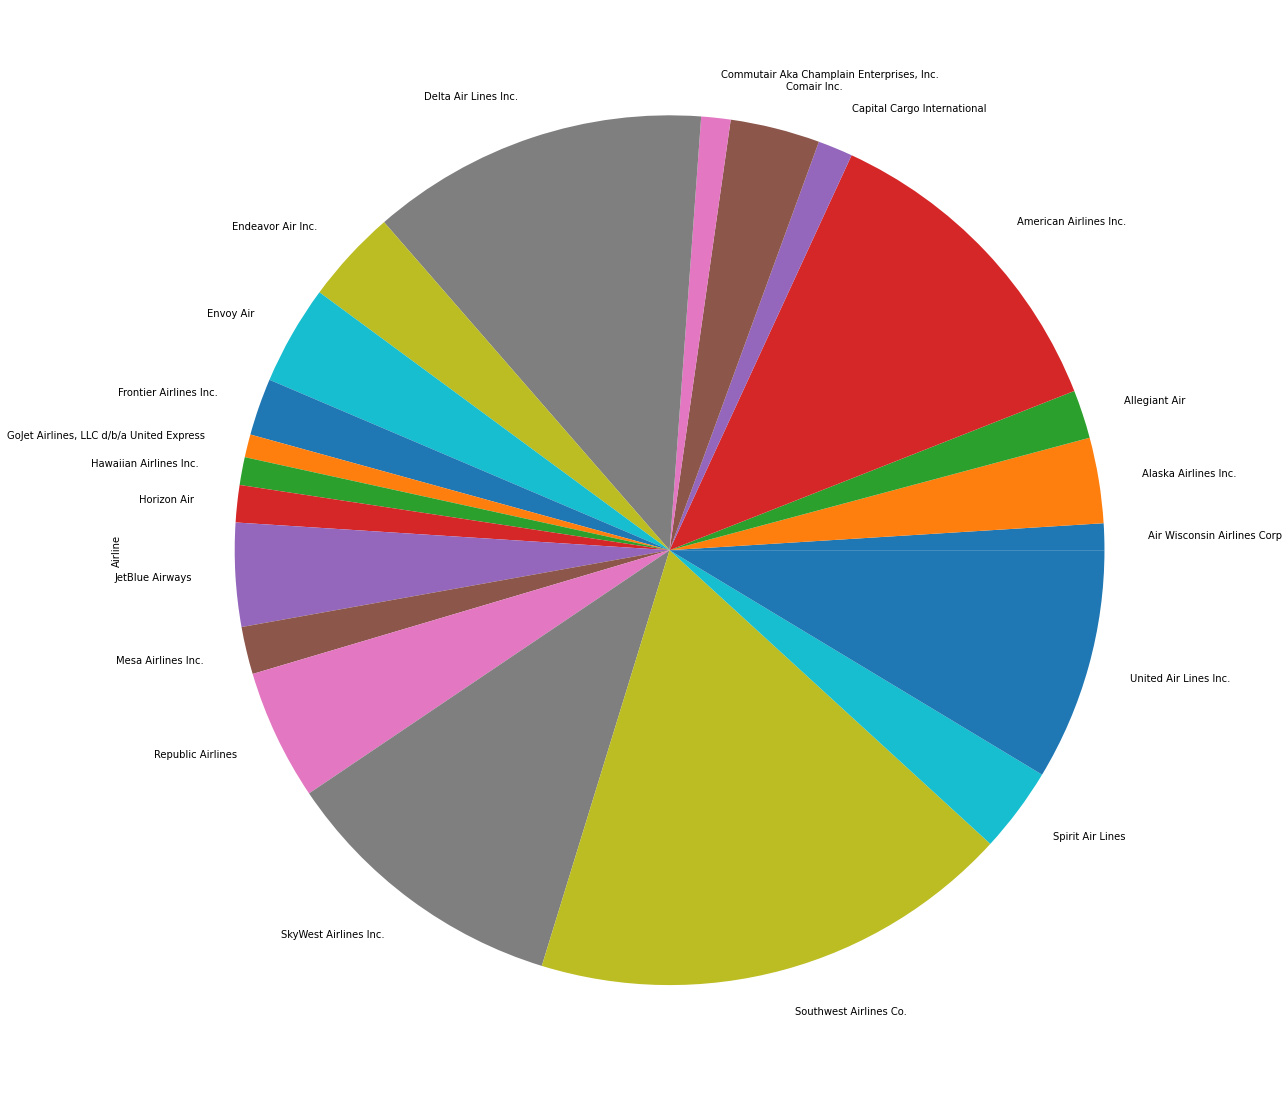

In [ ]:
import numpy as np
import pandas as pd
import os
from google.colab import drive

import matplotlib.pyplot as plt

drive.mount('/content/drive')

air = pd.read_csv('/content/drive/Shareddrives/IND708/Combined_Flights_2022.csv')

clean_air = air[['FlightDate','Airline','Cancelled','DepDelay', 'Month', 'OriginState'
 ,'DestState', 'DistanceGroup']]
clean_air['FlightDate'].describe()

airline_type = clean_air['Airline']

airline_type.value_counts().sort_index().plot(kind='pie', figsize=(20,20))

USE airline_type to create a pie chart show all the different airlines 

In [ ]:
airline_type

0          Commutair Aka Champlain Enterprises, Inc.
1          Commutair Aka Champlain Enterprises, Inc.
2          Commutair Aka Champlain Enterprises, Inc.
3          Commutair Aka Champlain Enterprises, Inc.
4          Commutair Aka Champlain Enterprises, Inc.
                             ...                    
4078313                            Republic Airlines
4078314                            Republic Airlines
4078315                            Republic Airlines
4078316                            Republic Airlines
4078317                            Republic Airlines
Name: Airline, Length: 4078318, dtype: object

FOR QUESTION 2

In [ ]:
cancel = clean_air['Cancelled']
cancel.dtype

dtype('bool')

In [ ]:
del_array= clean_air['DepDelay'].to_numpy()
del_array

array([-10.,  -4., -15., ..., 378., 113.,  -6.])

In [ ]:
def check_number(delay):
  return delay > 0
filtered = list(filter(check_number, del_array))

filtered

[6.0,
 29.0,
 14.0,
 15.0,
 1.0,
 25.0,
 319.0,
 5.0,
 79.0,
 3.0,
 75.0,
 2.0,
 10.0,
 20.0,
 50.0,
 2.0,
 21.0,
 111.0,
 15.0,
 12.0,
 31.0,
 82.0,
 34.0,
 11.0,
 2.0,
 9.0,
 29.0,
 5.0,
 34.0,
 2.0,
 40.0,
 2.0,
 110.0,
 3.0,
 6.0,
 5.0,
 131.0,
 8.0,
 120.0,
 97.0,
 36.0,
 57.0,
 50.0,
 8.0,
 56.0,
 46.0,
 45.0,
 22.0,
 76.0,
 26.0,
 117.0,
 128.0,
 19.0,
 58.0,
 357.0,
 8.0,
 11.0,
 111.0,
 1.0,
 2.0,
 28.0,
 143.0,
 51.0,
 38.0,
 11.0,
 48.0,
 13.0,
 73.0,
 180.0,
 186.0,
 31.0,
 88.0,
 38.0,
 39.0,
 58.0,
 20.0,
 8.0,
 10.0,
 54.0,
 15.0,
 28.0,
 12.0,
 7.0,
 59.0,
 39.0,
 14.0,
 60.0,
 25.0,
 37.0,
 26.0,
 11.0,
 3.0,
 31.0,
 33.0,
 45.0,
 85.0,
 65.0,
 26.0,
 52.0,
 1.0,
 64.0,
 62.0,
 11.0,
 16.0,
 9.0,
 160.0,
 11.0,
 19.0,
 69.0,
 108.0,
 151.0,
 10.0,
 110.0,
 13.0,
 10.0,
 6.0,
 14.0,
 14.0,
 35.0,
 6.0,
 98.0,
 13.0,
 34.0,
 55.0,
 99.0,
 97.0,
 51.0,
 12.0,
 62.0,
 79.0,
 80.0,
 119.0,
 59.0,
 41.0,
 8.0,
 125.0,
 6.0,
 72.0,
 11.0,
 17.0,
 100.0,
 112.0,
 46.0,
 111.0,

In [ ]:
dfq1 = pd.DataFrame(filtered)
print(dfq1)

             0
0          6.0
1         29.0
2         14.0
3         15.0
4          1.0
...        ...
1558881  154.0
1558882   25.0
1558883   44.0
1558884  378.0
1558885  113.0

[1558886 rows x 1 columns]


In [ ]:
clean_air['Clean_Delay']=dfq1


<ipython-input-17-360019cce9dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_air['Clean_Delay']=dfq1


In [ ]:
clean_air
question1 = clean_air[['Airline','Clean_Delay']]
airline_delay =question1.dropna()


Data frame FOR THIS QUESTION: * Which top 10 airlines have most no of delays ? Justin

USE "airline_delay" to plot 

In [ ]:
airline_delay

,Airline,Clean_Delay
0,"Commutair Aka Champlain Enterprises, Inc.",6.0
1,"Commutair Aka Champlain Enterprises, Inc.",29.0
2,"Commutair Aka Champlain Enterprises, Inc.",14.0
3,"Commutair Aka Champlain Enterprises, Inc.",15.0
4,"Commutair Aka Champlain Enterprises, Inc.",1.0
...,...,...
1558881,Delta Air Lines Inc.,154.0
1558882,Delta Air Lines Inc.,25.0
1558883,Delta Air Lines Inc.,44.0
1558884,Delta Air Lines Inc.,378.0


Text(0, 0.5, '# of Delays')

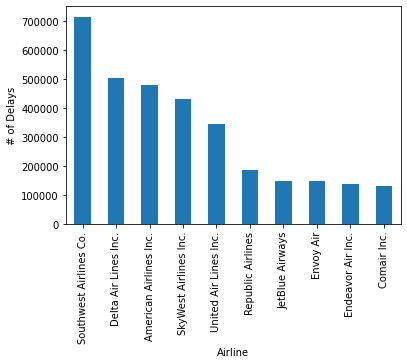

In [ ]:
import matplotlib.pyplot as plt

cancel = clean_air['Cancelled']

del_array= clean_air['DepDelay'].to_numpy()

def check_number(delay):
  return delay > 0
filtered = list(filter(check_number, del_array))

dfq1 = pd.DataFrame(filtered)

question1 = clean_air[['Airline', 'DepDelay']]
airline_delay =question1.dropna()


airline_delay['Airline'].value_counts()[:10].plot(kind='bar')

plt.xlabel('Airline')
plt.ylabel('# of Delays')

FOR QUESTION 3

In [ ]:
clean_cancel = pd.DataFrame(clean_air['Cancelled'])

clean_cancel_list = clean_cancel.values.tolist()

In [ ]:
clean_cancel_list


[[False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],


In [ ]:
clean_cancel_list = clean_air[clean_air['Cancelled'] == True]

In [ ]:
cancel_q2 = clean_cancel_list['Cancelled']

In [ ]:
airline_cancel = clean_cancel_list[['Airline', 'Cancelled']]

FOR QUESTION 3 which top 10 airlines have most no of cancellations ? Justin 
USE airline_cancel to plot

In [ ]:
airline_cancel

,Airline,Cancelled
949,"Commutair Aka Champlain Enterprises, Inc.",True
970,"Commutair Aka Champlain Enterprises, Inc.",True
982,"Commutair Aka Champlain Enterprises, Inc.",True
1001,"Commutair Aka Champlain Enterprises, Inc.",True
1451,"GoJet Airlines, LLC d/b/a United Express",True
...,...,...
4078196,Republic Airlines,True
4078200,Republic Airlines,True
4078234,Republic Airlines,True
4078311,Republic Airlines,True


Text(0, 0.5, '# of Cancellations')

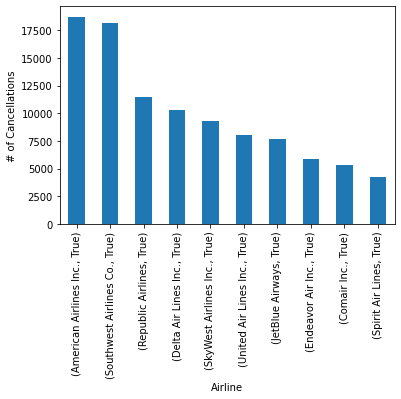

In [ ]:
import matplotlib.pyplot as plt

clean_cancel = pd.DataFrame(clean_air['Cancelled'])

clean_cancel_list = clean_cancel.values.tolist()

clean_cancel_list

clean_cancel_list = clean_air[clean_air['Cancelled'] == True]

cancel_q2 = clean_cancel_list['Cancelled']
airline_cancel = clean_cancel_list[['Airline', 'Cancelled']]
airline_cancel.value_counts()[:10].plot(kind='bar')

plt.xlabel('Airline')
plt.ylabel('# of Cancellations')

FOR QUESTION 4 which flight distance groups cancelled the most ?

Use distance_cancel to create a bar graph to see which distance group has the the most cancellations 


Text(0, 0.5, 'Number of Cancellations')

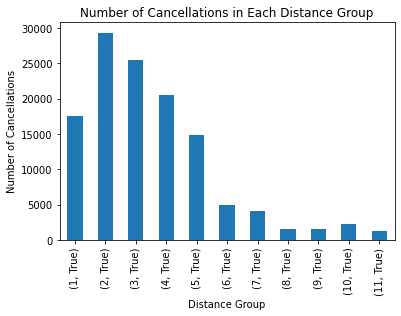

In [ ]:
distance_cancel = clean_cancel_list[['DistanceGroup','Cancelled']]
distance_cancel.value_counts().sort_index().plot(kind = 'bar')
plt.title("Number of Cancellations in Each Distance Group")
plt.xlabel("Distance Group")
plt.ylabel("Number of Cancellations")

FOR QUESTION 5 which states experienced most delays USE state_delay to graph for 

Delays based on state

In [ ]:
state_delay_prio = clean_air[['OriginState', 'Clean_Delay']]
state_delay = state_delay_prio.dropna()

In [ ]:
state_delay.sort_index().plot(kind='bar')

Question 6 Which state experienced the most cancellations 

USE state_cancel to find out which state had to the most cancellations 

In [ ]:
state_cancel = clean_cancel_list[['OriginState', 'Cancelled']]

Text(0, 0.5, 'Number of Cancellations')

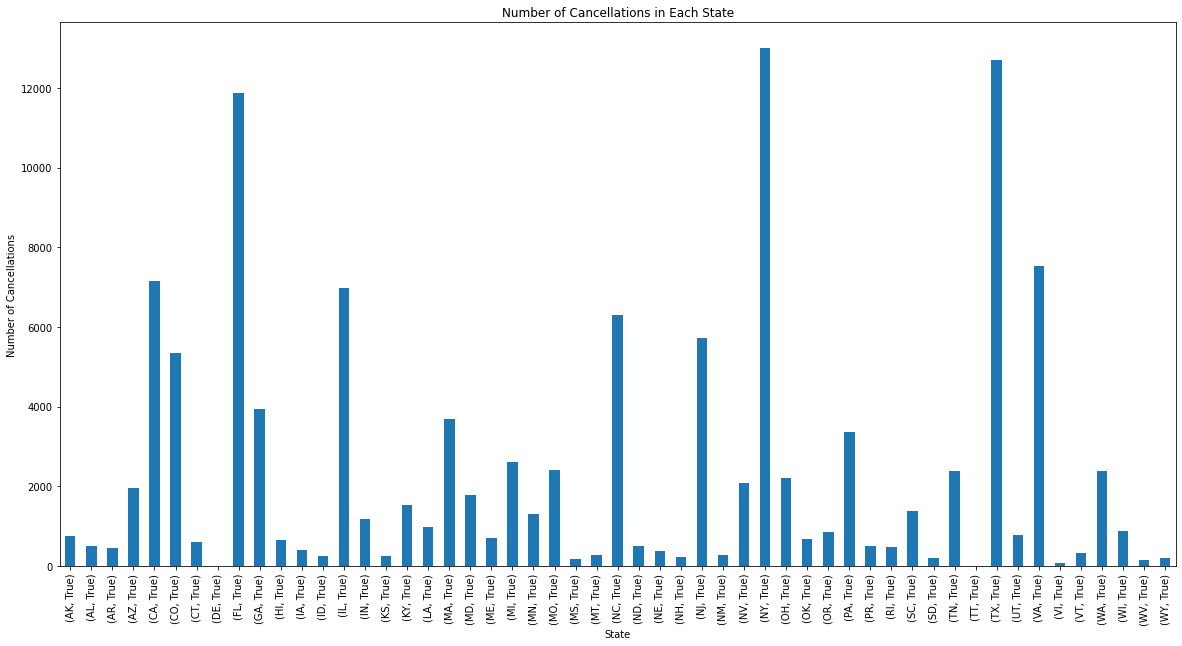

In [ ]:
state_cancel

state_cancel.value_counts().sort_index().plot(kind='bar', figsize= (20,10))
plt.title("Number of Cancellations in Each State")
plt.xlabel("State")
plt.ylabel("Number of Cancellations")

QUESITON 7 Which months had the most cancellations 

USE month_cancel to find out which month had the most cancellations 


In [ ]:
month_cancel = clean_cancel_list[['Month','Cancelled']]

Text(0, 0.5, 'Number of Cancellations')

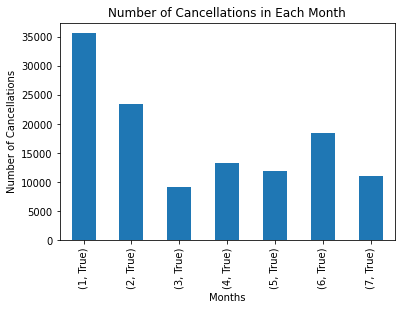

In [ ]:
month_cancel
month_cancel.value_counts().sort_index().plot(kind='bar')
plt.title("Number of Cancellations in Each Month")
plt.xlabel("Months")
plt.ylabel("Number of Cancellations")

Question 8 Trend line of the number of flights per year (x-axis is day, y-axis is number of flights

Use months to plot for number of flights PER MONTH  - AIDAN

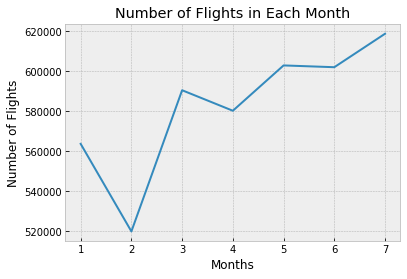

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('bmh')
months = clean_air['Month']
q8_trend = pd.Series(months.value_counts(), index=months.index)
plt.title("Number of Flights in Each Month")
plt.xlabel("Months")
plt.ylabel("Number of Flights")
q8_trend.plot()


Question 9 Trend line of number of cancellations per year (x-axis is month, y-axis is number of cancellations)

USE month_cancel to plot trend line of number of cancellations per month   - AIDAN

Text(0, 0.5, 'Number of Cancellations')

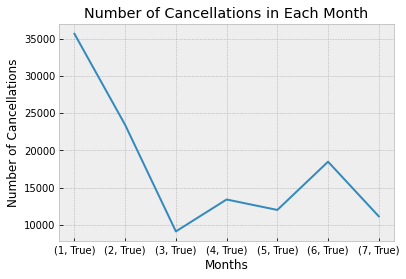

In [ ]:
month_cancel
# matplotlib.style.use('bmh')
# q9_trend = pd.Series(month_cancel.value_counts(), index= month_cancel)
# plt.title("Number of Cancellations in Each Month")
# plt.xlabel("Months")
# plt.ylabel("Number of Cancellations")
# q9_trend.plot()


month_cancel.value_counts().sort_index().plot()
plt.title("Number of Cancellations in Each Month")
plt.xlabel("Months")
plt.ylabel("Number of Cancellations")


Question 10 number of delays per month   -AIDAN

In [ ]:
month_cancel

,Month,Cancelled
949,4,True
970,4,True
982,4,True
1001,4,True
1451,4,True
...,...,...
4078196,3,True
4078200,3,True
4078234,3,True
4078311,3,True


In [ ]:
month_delay = clean_air[['Clean_Delay', 'Month']]
#month_delay = month_delay.dropna()

Text(0, 0.5, 'Number of Delays')

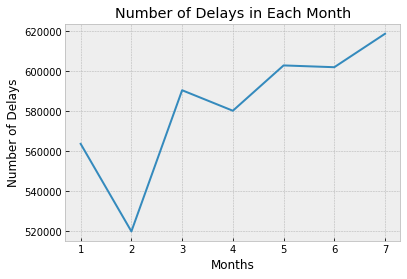

In [ ]:
month_delay['Month'].value_counts().sort_index().plot()
plt.title("Number of Delays in Each Month")
plt.xlabel("Months")
plt.ylabel("Number of Delays")
# matplotlib.style.use('bmh')
# q10_trend = pd.Series(month_delay.value_counts(), index=['Month'])
# plt.title("Number of Cancellations in Each Month")
# plt.xlabel("Months")
# plt.ylabel("Number of Cancellations")
# q10_trend.plot()